### 莫烦 sklearn

In [2]:
import numpy as np
from sklearn import datasets
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [7]:
np.shape(iris_X)

(150, 4)

In [8]:
iris_X[:2,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [9]:
np.shape(iris_y)

(150,)

In [11]:
iris_y[:2]

array([0, 0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)

In [14]:
y_train #是打乱的

array([1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1, 0,
       2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0])

In [15]:
np.shape(y_train) # 150*0.7=105

(105,)

#### KNN分类

In [17]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
knn.predict(X_test)

array([2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2,
       2])

In [20]:
y_test

array([2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2,
       2])

In [21]:
print(np.sum(knn.predict(X_test)==y_test)/y_test.size) #直接统计准确率

1.0


## 数据库的使用
## 波士顿房价--线性回归

In [22]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [23]:
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

In [25]:
np.shape(data_X),np.shape(data_y)

((506, 13), (506,))

In [27]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.fit(data_X, data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#用前4个值预测
model.predict(data_X[:4,:])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649])

In [30]:
data_y[:4]

array([24. , 21.6, 34.7, 33.4])

### 创造数据

In [32]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

#### 100样本，1个特征，1个

In [35]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)

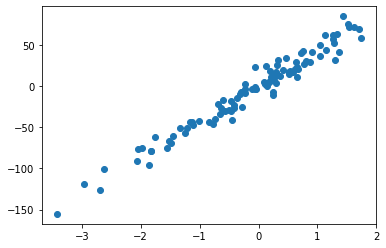

In [36]:
plt.scatter(X,y)

### model的属性和功能

In [62]:
x=np.array(np.arange(1,10,1))
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
y=3*x+1
y

array([ 4,  7, 10, 13, 16, 19, 22, 25, 28])

In [64]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
model.coef_ #斜率

array([3.])

In [68]:
model.intercept_ #截距

0.9999999999999982

In [70]:
model.get_params() #model的定义参数
# n_jobs: 用几个核来运算

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [80]:
model.score(x.reshape(-1,1),y) #线性回归模型中 R^2 coefficient of determination

1.0

In [74]:
x.T

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
x.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [78]:
type(x.reshape(-1,1))

numpy.ndarray

In [79]:
type(x.T)

numpy.ndarray

## 归一化

In [81]:
from sklearn import preprocessing
import numpy as np

In [82]:
a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]],dtype=np.float64)
a

array([[  10. ,    2.7,    3.6],
       [-100. ,    5. ,   -2. ],
       [ 120. ,   20. ,   40. ]])

#### 标准归一化

In [83]:
preprocessing.scale(a) # z-score归一化

array([[ 0.        , -0.85170713, -0.55138018],
       [-1.22474487, -0.55187146, -0.852133  ],
       [ 1.22474487,  1.40357859,  1.40351318]])

In [87]:
np.mean(preprocessing.scale(a)[:,0])

0.0

In [88]:
np.mean(preprocessing.scale(a)[:,1])

1.4802973661668753e-16

In [89]:
np.mean(preprocessing.scale(a)[:,2])

0.0

In [90]:
np.var(preprocessing.scale(a)[:,0])

1.0000000000000002

In [91]:
np.var(preprocessing.scale(a)[:,1])

1.0

In [92]:
np.var(preprocessing.scale(a)[:,2])

1.0000000000000002

#### SVC

In [94]:
from sklearn import preprocessing
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#### 生成数据

In [102]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                          random_state=22, n_clusters_per_class=1, scale=100)
X, y
# n_informative=2 有两个比较相关的属性
# random_state=22 随机数种子，使每次运行结果一致


(array([[ 2.70291644e+02,  6.61960634e+01],
        [-1.14084935e+02,  2.08200955e+02],
        [ 1.38261970e+02,  9.79644473e+01],
        [ 8.21203452e+01,  1.28324302e+02],
        [-6.70488205e+01,  1.75784878e+02],
        [-6.47279575e+01,  1.29540413e+02],
        [-1.60748166e+01,  1.44843357e+02],
        [-1.79714897e+02,  1.96165553e+02],
        [ 1.76269553e+02,  1.00173580e+02],
        [-1.54076833e+01, -5.64748124e+01],
        [ 2.56337099e+02,  6.62380127e+01],
        [ 7.52877073e+01,  1.29259799e+02],
        [ 1.51916699e+02,  1.03674608e+02],
        [-1.74036881e+01, -1.09809931e+02],
        [-2.17281661e+02,  2.09410434e+02],
        [ 1.84961277e+02,  8.31168771e+01],
        [ 1.23365618e+02,  9.42965851e+01],
        [ 1.53526893e+02,  8.46167054e+01],
        [-6.59803508e+01,  1.65330660e+02],
        [ 2.27066131e+02,  5.06131500e+01],
        [-8.59372556e+01,  4.36002296e+01],
        [-1.08302436e+02,  2.67706031e+02],
        [ 3.74017943e+01,  9.530

In [96]:
np.shape(X)

(300, 2)

In [97]:
np.shape(y)

(300,)

In [100]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

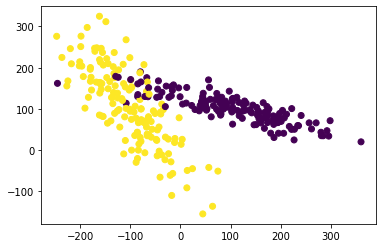

In [103]:
plt.scatter(X[:,0],X[:,1],c=y)

In [104]:
X = preprocessing.scale(X)

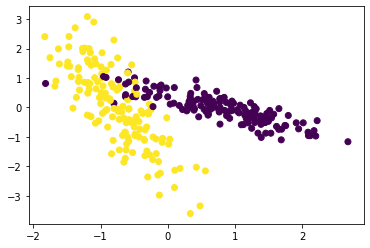

In [105]:
plt.scatter(X[:,0],X[:,1],c=y)

In [106]:
X = preprocessing.minmax_scale(X,feature_range=(-1,1))

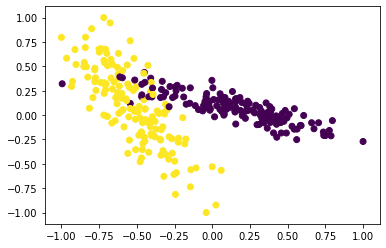

In [107]:
plt.scatter(X[:,0],X[:,1],c=y)

In [108]:
X = preprocessing.minmax_scale(X,feature_range=(0,1)) #默认

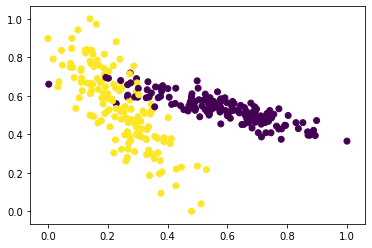

In [109]:
plt.scatter(X[:,0],X[:,1],c=y)

In [110]:
X = preprocessing.minmax_scale(X) #默认

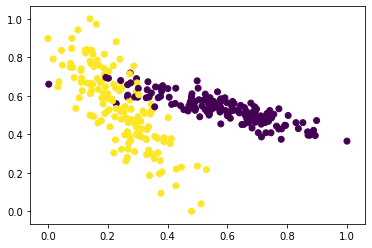

In [111]:
plt.scatter(X[:,0],X[:,1],c=y)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [114]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [115]:
clf.fit(X_train, y_train)

E:\Anaconda\envs\python3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [116]:
clf.score(X_test,y_test)

0.8888888888888888

#### 不归一化

In [117]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                          random_state=22, n_clusters_per_class=1, scale=100)
X, y
# n_informative=2 有两个比较相关的属性
# random_state=22 随机数种子，使每次运行结果一致

(array([[ 2.70291644e+02,  6.61960634e+01],
        [-1.14084935e+02,  2.08200955e+02],
        [ 1.38261970e+02,  9.79644473e+01],
        [ 8.21203452e+01,  1.28324302e+02],
        [-6.70488205e+01,  1.75784878e+02],
        [-6.47279575e+01,  1.29540413e+02],
        [-1.60748166e+01,  1.44843357e+02],
        [-1.79714897e+02,  1.96165553e+02],
        [ 1.76269553e+02,  1.00173580e+02],
        [-1.54076833e+01, -5.64748124e+01],
        [ 2.56337099e+02,  6.62380127e+01],
        [ 7.52877073e+01,  1.29259799e+02],
        [ 1.51916699e+02,  1.03674608e+02],
        [-1.74036881e+01, -1.09809931e+02],
        [-2.17281661e+02,  2.09410434e+02],
        [ 1.84961277e+02,  8.31168771e+01],
        [ 1.23365618e+02,  9.42965851e+01],
        [ 1.53526893e+02,  8.46167054e+01],
        [-6.59803508e+01,  1.65330660e+02],
        [ 2.27066131e+02,  5.06131500e+01],
        [-8.59372556e+01,  4.36002296e+01],
        [-1.08302436e+02,  2.67706031e+02],
        [ 3.74017943e+01,  9.530

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [120]:
clf.fit(X_train, y_train)

E:\Anaconda\envs\python3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
clf.score(X_test,y_test)

0.4777777777777778

#### 未归一化0.48 ==> 归一化0.89

### 交叉验证

In [123]:
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [124]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [125]:
X = iris.data
y = iris.target

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
X_train

array([[6.7, 3.1, 4.7, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5. , 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [5.5, 2

In [128]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
y_pred = knn.predict(X_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [131]:
knn.score(X_test,y_test)

0.9736842105263158

In [133]:
from sklearn.model_selection import cross_val_score

In [135]:
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [136]:
scores.mean()

0.9733333333333334

#### 可视化

In [139]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [163]:
k_range = range(1,31)
k_scores = []
k_loss=[]

In [164]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error') # for regression
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') # for classification
    k_scores.append(scores.mean())
    k_loss.append(loss.mean())

In [161]:
loss

array([0.06666667, 0.06666667, 0.        , 0.06666667, 0.        ,
       0.13333333, 0.06666667, 0.06666667, 0.        , 0.        ])

In [153]:
np.shape(k_scores)

(30,)

In [152]:
np.shape(k_range)

(30,)

In [148]:
k_range,k_scores

(range(1, 31),
 [0.96,
  0.9533333333333334,
  0.9666666666666666,
  0.9666666666666666,
  0.9666666666666668,
  0.9666666666666668,
  0.9666666666666668,
  0.9666666666666668,
  0.9733333333333334,
  0.9666666666666668,
  0.9666666666666668,
  0.9733333333333334,
  0.9800000000000001,
  0.9733333333333334,
  0.9733333333333334,
  0.9733333333333334,
  0.9733333333333334,
  0.9800000000000001,
  0.9733333333333334,
  0.9800000000000001,
  0.9666666666666666,
  0.9666666666666666,
  0.9733333333333334,
  0.96,
  0.9666666666666666,
  0.96,
  0.9666666666666666,
  0.9533333333333334,
  0.9533333333333334,
  0.9533333333333334,
  0.96,
  0.9533333333333334,
  0.9666666666666666,
  0.9666666666666666,
  0.9666666666666668,
  0.9666666666666668,
  0.9666666666666668,
  0.9666666666666668,
  0.9733333333333334,
  0.9666666666666668,
  0.9666666666666668,
  0.9733333333333334,
  0.9800000000000001,
  0.9733333333333334,
  0.9733333333333334,
  0.9733333333333334,
  0.9733333333333334,
  0.980

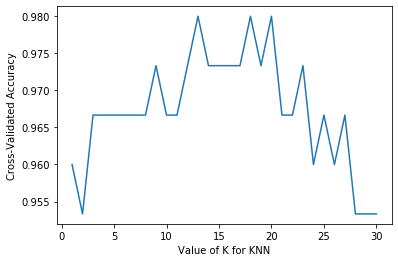

In [165]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### 回归比 neg_mean_squared_error 要比 accuracy 好

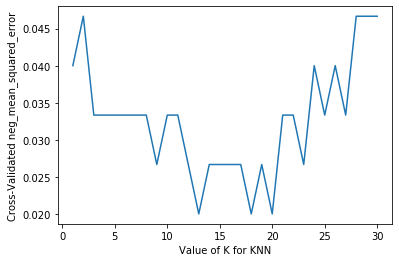

In [167]:
plt.plot(k_range,k_loss)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated neg_mean_squared_error')
plt.show()

## 结果可视化

In [168]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [170]:
digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])
train_sizes, train_loss, test_loss

(array([ 161,  403,  806, 1209, 1612]),
 array([[-0.        , -0.09937888, -0.09937888, -0.09937888, -0.09937888,
         -0.09937888, -0.09937888, -0.09937888, -0.09937888, -0.09937888],
        [-0.        , -0.03970223, -0.03970223, -0.03970223, -0.03970223,
         -0.03970223, -0.03970223, -0.03970223, -0.03970223, -0.03970223],
        [-0.        , -0.01985112, -0.01985112, -0.01985112, -0.01985112,
         -0.01985112, -0.01985112, -0.01985112, -0.01985112, -0.01985112],
        [-0.        , -0.0165426 , -0.01323408, -0.01323408, -0.01323408,
         -0.01323408, -0.01323408, -0.01323408, -0.01323408, -0.01323408],
        [-0.02233251, -0.03225806, -0.01054591, -0.03225806, -0.03225806,
         -0.03225806, -0.03225806, -0.03225806, -0.03225806, -0.00992556]]),
 array([[-9.94594595e-01, -1.77049180e+00, -4.19337017e+00,
         -9.39444444e+00, -6.99441341e+00, -5.26815642e+00,
         -3.31843575e+00, -4.73033708e+00, -3.66101695e+00,
         -4.79545455e+00],
      

In [171]:
np.shape(train_sizes),np.shape(train_loss),np.shape(test_loss)

((5,), (5, 10), (5, 10))

In [173]:
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)
train_loss_mean,test_loss_mean

(array([0.08944099, 0.03573201, 0.017866  , 0.01224152, 0.02686104]),
 array([4.51207152, 1.77795433, 0.68252303, 0.51054159, 0.38381741]))

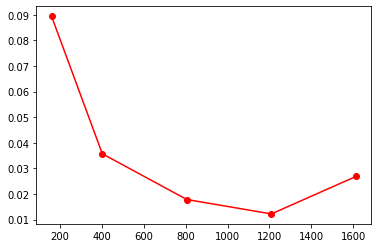

In [174]:
plt.plot(train_sizes,train_loss_mean,'o-',color="r",label="Training")

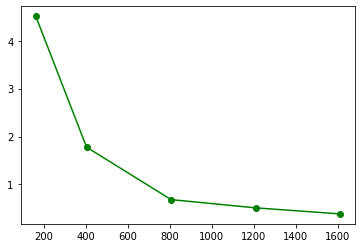

In [175]:
plt.plot(train_sizes,test_loss_mean,'o-',color="g",label="Cross-validation")

## learning-curve 是训练到10%，25%，50%，75%，100%各个时间点，训练集和测试集的Loss

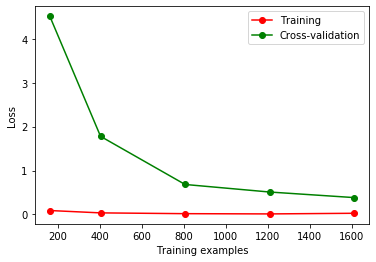

In [176]:
plt.plot(train_sizes,train_loss_mean,'o-',color="r",label="Training")
plt.plot(train_sizes,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

## 过拟合

In [178]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [187]:
digits = load_digits()
X = digits.data
y = digits.target
gamma_range = np.logspace(-6,-2.3,5)# -6 到-2.3中取 5个点
train_loss, test_loss = validation_curve(
    SVC(),X,y,param_name='gamma',param_range=gamma_range,cv=10,scoring='neg_mean_squared_error',
)

In [188]:
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

## 选取不同的模型参数，如gamma，绘制每个gamma对应的训练集和测试集的Loss

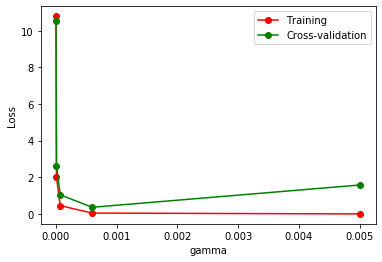

In [189]:
plt.plot(gamma_range,train_loss_mean,'o-',color="r",label="Training")
plt.plot(gamma_range,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

### 保存model

In [190]:
from sklearn import svm
from sklearn import datasets

In [191]:
clf = svm.SVC()
iris = datasets.load_iris()
X,y = iris.data,iris.target
clf.fit(X,y)

E:\Anaconda\envs\python3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### method 1:pickle

In [192]:
import pickle

#### 保存

In [194]:
with open('save/clf.pickle','wb') as f:
    pickle.dump(clf,f)

#### 导出

In [195]:
with open('save/clf.pickle','rb') as f:
    df2 = pickle.load(f)
    print(df2.predict(X[0:1]))

[0]


#### method 2: joblib

In [196]:
from sklearn.externals import joblib

E:\Anaconda\envs\python3.6\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [197]:
# save
joblib.dump(clf,'save/clf.pkl')

['save/clf.pkl']

In [198]:
#restore
clf3 = joblib.load('save/clf.pkl')
print(clf3.predict(X[0:1]))

[0]
